# HW 2 Gradient Descent & Regularization
## Joby George (jg6615)
## Due 2/16/2022



# Problem 1: Training Error Proof

Show

$$
    \textrm{Training Error} = \frac{1}{N} \Big|\Big| \Big( X(X^TX)^{-1}X^T - I \Big) \epsilon \Big| \Big|^2_2
$$

## Problem 1 Answer:

We know:

$$ Training Error  = \frac{1}{N}||X\hat{b} - y||_2^2 $$
$$\hat{b} = (X^TX)^{-1}X^Ty$$
$$y = X\beta + \epsilon $$


Plugging $\hat{b}$ into our definition of training error, we get:

$$ Training Error  = \frac{1}{N}||X(X^TX)^{-1}X^Ty - y||_2^2 $$

Plugging in our definition of y we get: 

$$ Training Error  = \frac{1}{N}||X(X^TX)^{-1}X^T(X\beta + \epsilon)  - X\beta - \epsilon ||_2^2 $$

<div style="page-break-after: always;"></div>

Simplifying the expression, we see:

$$ Training Error  = \frac{1}{N}||X(X^TX)^{-1}X^TX\beta + X(X^TX)^{-1}X^T\epsilon)  - X\beta - \epsilon ||_2^2 $$

(X^TX)^{-1}X^TX simplifies to Id_d, giving us 

$$ Training Error  = \frac{1}{N}||X\beta + X(X^TX)^{-1}X^T\epsilon  - X\beta - \epsilon ||_2^2 $$

$$ Training Error  = \frac{1}{N}||X(X^TX)^{-1}X^T\epsilon   - \epsilon ||_2^2 $$


$$ Training Error  = \frac{1}{N}||(X(X^TX)^{-1}X^T-I)\epsilon||_2^2 $$ 

### Q.E.D.

# Problem 2: Expected Training Error Proof

Show 
$$ E(Training Error) = \frac{(N-d)\sigma^2}{N}$$

### Step 1:

Let A = $X(X^TX)^{-1}$. A is a square symetric matrix where $A^2$ = A (hints)

Pull out the 1/N from our expectation, and apply $L_2$ Norm.

$$ E(Training Error) = \frac{1}{N}E[\langle{(A-I)\epsilon, (A-I)\epsilon}\rangle]$$


### Step 2:  Compute dot product

$$ = \frac{1}{N}E[\epsilon^T(A^2 - 2A + I)\epsilon]$$

since $A^2$ = A, we can simplify before left multiplying by $\epsilon^T$

$$ = \frac{1}{N}E[\epsilon^T(I-A)\epsilon]$$


$$ = \frac{1}{N}E[(\epsilon^TI-\epsilon^TA)\epsilon]$$

$$ = \frac{1}{N}E(\epsilon^TI\epsilon) - E(\epsilon^TA\epsilon)$$ by linearity of expectation
 
Since $\epsilon$ is a zero mean random vector with variance $\sigma^2$ we know E($\epsilon^2$) = $\sum_1^n$
$\sigma^2$

Giving us 

$$ E(Training Error) = \frac{1}{N}* N\sigma^2 - E(\epsilon^TA\epsilon) $$

### Step 3: calculate quadratic form expectation

From hint 3 we know that A is a rank **d** matrix, as A is full rank of D. Furthermore since A = $A^2$ we know the only eigenvalues it can have are 1 and 0, and with a rank of D it must have n-d 0 eigenvalues by rank nullity theorem.

Since $\epsilon^TA\epsilon$ is a quadratic form, we know the resulting multiplication equals Trace($\epsilon^TA\epsilon$)

The expected value of this multiplication would be Trace($\epsilon^TA\epsilon$) - $\mu_{\epsilon}$$\mu_{\epsilon}^T$. We know that $\mu_{\epsilon}$ = 0 meaning 


$$ E(\epsilon^TA\epsilon) = Trace(\epsilon^TA\epsilon)$$

Since A is a symetric matrix, the trace is the sum of it's eigenvalues, which in this case equals D, as the matrix has D eigenvalues of 1. 

Trace($\epsilon^T\epsilon$) = $\sigma^2$ giving us 

$$ E(\epsilon^TA\epsilon) = Trace(\epsilon^TA\epsilon) = d\sigma^2$$

Plugging this into our solution we get: 

$$ E(Training Error) = \frac{(N-d)\sigma^2}{N} $$

### Q.E.D.



# Problem 3:

Give a reason as to why the training error is very low when d is close to N i.e. when we overfit the data.

### Answer

If we have d linearly independent columns as d approaches n, we are able to span bigger spaces. Since y $\in$ $R^n$ if d = n, the y vector is in the span of our design matrix, meaning we can create a perfect fit to our training data. 

However, since our perfect fit will give us zero training error, our model will become overly sensitive to any noise components that are a part of the data gathering or measurement process, and when we apply our model to a different set of input data, we will see noticeably worse performance on a new dataset (i.e. overfitting to the training dataset).


<div style="page-break-after: always;"></div>

# Problem 4 Feature Normalization Function and validation

In the below cell, i define the function for Feature Normalization as described in the problem.

I will QA the function does what it is intended to do by:

        1. running the load data function, which calls our feature_normalization function
        
        2. evaluate the number of unique values in train and test set 
            success criteria: num_unique_values >= 2
            
        3. evaluate the range of values in train and test set 
            success criteria: all columns range from 0 to 1 in the train data set

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size(num_instances, num_features)
        test - test set, a 2D numpy array of size(num_instances, num_features)

    Returns:
        train_normalized - training set after normalization
        test_normalized - test set after normalization
    """
    
    #implement constant feature value check on both train and test:
    train_normalized, test_normalized = [], []
    
    for feature_index in range(0,train.shape[1]):

        feature = train[:,feature_index]
        if len(np.unique(feature)) > 1:
            feature_min = np.min(feature)
            feature_max = np.max(feature)
            
            train[:,feature_index] = (train[:,feature_index] - feature_min)/(feature_max- feature_min)
            train_normalized.append(train[:,feature_index])
            
            test[:,feature_index] = (test[:,feature_index]-feature_min)/(feature_max- feature_min)
            test_normalized.append(test[:,feature_index])
            
    train_normalized = np.array(train_normalized).T
    test_normalized = np.array(test_normalized).T
    
    return(train_normalized, test_normalized)

def load_data():
    #Loading the dataset
    print('loading the dataset')

    df = pd.read_csv('ridge_regression_dataset.csv', delimiter=',')
    X = df.values[:,:-1]
    y = df.values[:,-1]

    print('Split into Train and Test')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=10)
    
    print("Scaling all to [0, 1]")
    X_train, X_test = feature_normalization(X_train, X_test)
    
    X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
    X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
    return X_train, y_train, X_test, y_test



X_train, y_train, X_test, y_test = load_data()

#https://stackoverflow.com/questions/48473056/number-of-unique-elements-per-row-in-a-numpy-array
from toolz import compose

#check whether all columns except the bias column have >= 2 unique values
cond1 = min(np.apply_along_axis(compose(len, np.unique), 0, X_train[:,0:48])) >= 2 

cond2 = min(np.apply_along_axis(compose(len, np.unique), 0, X_test[:,0:48])) >=2

cond1 + cond2

loading the dataset
Split into Train and Test
Scaling all to [0, 1]


True

In [2]:
#check wheather the max and min are 1 and 0 respectively
cond1 = max(X_train[0:48].max(axis=0)) == 1
cond2 = min(X_train[:,0:48].min(axis=0)) == 1

cond1 + cond2

True

# Problem 5

Write the objective function for linear regression using Linear Algebra notation

$$ J(\theta) = \underset {\theta}{\arg\min} \frac{1}{M}||X\theta  -y||_2^2 $$

### Q.E.D.

# Problem 6

Calculate the gradient of J using Linear Algebra Notation

$$\nabla J(\theta) = \frac{1}{m}\langle(-y^T + \theta^TX^T)(X\theta-y)\rangle \frac{\delta_J}{\delta_\theta} $$

$$= \frac{1}{m}[-y^TX\theta + y^Ty +\theta^TX^TX\theta - \theta^TX^Ty]\frac{\delta_J}{\delta_\theta} $$

$$= \frac{1}{m}[-y^TX +2X^TX\theta - X^Ty] $$

since $y^T$X = $X^T$y, we get: 


$$= \frac{2}{m}[ X^TX\theta - X^Ty] $$

### Q.E.D

# Problem 7

Write down the expression for updating $\theta$ in the gradient descent algorithm for a step size $\eta$.

$$\theta_{i+1} = \theta_i - \eta\nabla J(\theta_i) $$

Plugging in  $\nabla$ J

$$\theta_{i+1} = \theta_i - \eta \frac{2}{m}[X^TX\theta_i - X^Ty] $$

### Q.E.D

# Problem 8

Complete the compute_square_loss function, done below

In [3]:
### The square loss function
def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the average square loss for predicting y with X*theta.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D array of size(num_features)

    Returns:
        loss - the average square loss, scalar
    """
    num_rows = X.shape[0]
    y_hat = X@theta
    return(1/num_rows * sum((y_hat-y)**2))

# Problem 9

Complete the compute_square_loss_gradient function, done below

In [4]:
def compute_square_loss_gradient(X, y, theta):
    """
    Compute the gradient of the average square loss(as defined in compute_square_loss), at the point theta.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)

    Returns:
        grad - gradient vector, 1D numpy array of size(num_features)
    """
    #Calculate number of observations
    m = X.shape[0]
    #Calculate gradient using closed form solution from problem 6
    gradient = ((X.T @ X @ theta) - (X.T @ y)) * 2/m
    #Return gradient
    return(gradient)



# Problem 10

Complete the function grad_checker, done below 

In [5]:
#######################################
### Gradient checker
#Getting the gradient calculation correct is often the trickiest part
#of any gradient-based optimization algorithm. Fortunately, it's very
#easy to check that the gradient calculation is correct using the
#definition of gradient.
#See http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization
def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4):
    """Implement Gradient Checker
    Check that the function compute_square_loss_gradient returns the
    correct gradient for the given X, y, and theta.

    Let d be the number of features. Here we numerically estimate the
    gradient by approximating the directional derivative in each of
    the d coordinate directions:
(e_1 =(1,0,0,...,0), e_2 =(0,1,0,...,0), ..., e_d =(0,...,0,1))

    The approximation for the directional derivative of J at the point
    theta in the direction e_i is given by:
(J(theta + epsilon * e_i) - J(theta - epsilon * e_i)) /(2*epsilon).

    We then look at the Euclidean distance between the gradient
    computed using this approximation and the gradient computed by
    compute_square_loss_gradient(X, y, theta).  If the Euclidean
    distance exceeds tolerance, we say the gradient is incorrect.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)
        epsilon - the epsilon used in approximation
        tolerance - the tolerance error

    Return:
        A boolean value indicating whether the gradient is correct or not
    """
    true_gradient = compute_square_loss_gradient(X, y, theta) #The true gradient
    
    num_features = len(theta)
    
    temp_list = []
    identity = np.identity(len(theta))
    
    for i in range(len(theta)):
        first_part = compute_square_loss(X,y,theta+epsilon*identity[:,i])
        second_part = compute_square_loss(X,y,theta-epsilon*identity[:,i])
        
        answer = (first_part - second_part)/(2*epsilon)
        temp_list.append(answer)
        
    answer = np.array(temp_list)
    
    vector_distance = (true_gradient-answer)**2
    
    l2_distance = np.sqrt(np.sum(vector_distance))
    
    if l2_distance < tolerance:
        return(True)
        #return(True)
    else:
        return(False)

# Problem 11

Complete the function batch_gradient_descent, done below

In [6]:
### Batch gradient descent
def batch_grad_descent(X, y, alpha=0.1, num_step=1000, grad_check=False):
    """
    In this question you will implement batch gradient descent to
    minimize the average square loss objective.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        alpha - step size in gradient descent
        num_step - number of steps to run
        grad_check - a boolean value indicating whether checking the gradient when updating

    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size(num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step(num_step) is theta_hist[-1]
        loss_hist - the history of average square loss on the data, 1D numpy array,(num_step+1)
    """
    
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_step + 1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_step + 1)  #Initialize loss_hist
    theta = np.zeros(num_features)  #Initialize theta
    
    for i in range(0,num_step):
        #Compute Gradient and Calculate and Append Loss
        temp_grad = compute_square_loss_gradient(X,y,theta)
        loss_hist[i] = compute_square_loss(X,y,theta)

        #Calculate and write new theta
        theta = theta - (alpha * temp_grad)
        theta_hist[i,:] = theta
    loss_hist[1000] = compute_square_loss(X,y,theta)
    #Return theta_hist, loss_hist    
    return theta_hist, loss_hist    

# Problem 12:

Run batch gradient descent, varying step sizes of .5, .1, .05 and .01

Plot average square loss on the training set as afunction of the number of steps for each learning rate

In [7]:
theta_hist_5, loss_hist_5 = batch_grad_descent(X_train,y_train, alpha =.5)
theta_hist_1, loss_hist_1 = batch_grad_descent(X_train,y_train, alpha =.1)
theta_hist_05, loss_hist_05 = batch_grad_descent(X_train,y_train, alpha =.05)
theta_hist_01, loss_hist_01 = batch_grad_descent(X_train,y_train, alpha =.01)

<ipython-input-3-160399dc77d2>:16: RuntimeWarning: overflow encountered in double_scalars
  return(1/num_rows * sum((y_hat-y)**2))
<ipython-input-3-160399dc77d2>:16: RuntimeWarning: overflow encountered in square
  return(1/num_rows * sum((y_hat-y)**2))
<ipython-input-4-58f67f47251f>:16: RuntimeWarning: overflow encountered in multiply
  gradient = ((X.T @ X @ theta) - (X.T @ y)) * 2/m
<ipython-input-3-160399dc77d2>:15: RuntimeWarning: invalid value encountered in matmul
  y_hat = X@theta
<ipython-input-6-c5439029b13f>:31: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (alpha * temp_grad)
<ipython-input-4-58f67f47251f>:16: RuntimeWarning: overflow encountered in matmul
  gradient = ((X.T @ X @ theta) - (X.T @ y)) * 2/m


/Users/jobygeorge/opt/anaconda3/lib/python3.8/site-packages/numpy/ma/core.py:6845: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


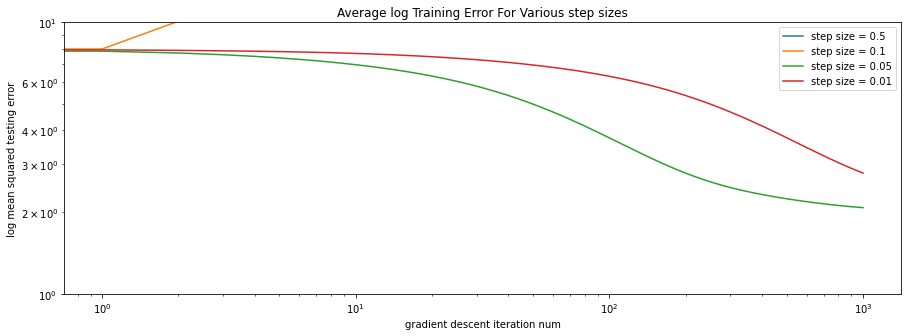

In [8]:
x_axis = list(range(1001))
#Begin plotting
plt.figure(figsize=(15, 5))
plt.plot(x_axis,loss_hist_5, label='step size = 0.5')
plt.plot(x_axis,loss_hist_1, label='step size = 0.1')
plt.plot(x_axis,loss_hist_05,label='step size = 0.05')
plt.plot(x_axis,loss_hist_01,label='step size = 0.01')

plt.ylabel('log mean squared testing error')
plt.xlabel('gradient descent iteration num')
plt.xscale('log')
plt.yscale('log')
plt.title("Average log Training Error For Various step sizes")
plt.legend()

### Problem 12 graph commentary

A step size that is too large (.5 and .1) quickly diverge on training error. We aren't able to even see the training error of .5 as it quickly reaches infinity.

However, smaller step sizes (.01, .05) converge, with .05 having the optimal performance in minimizing training error through 1000 iterations. 

# Problem 13:

Plot the average test square loss for the above learning rates as a function of number of steps

In [9]:
#initialize lists to store loss on test dataset
loss_hist_test_5, loss_hist_test_1, loss_hist_test_05, loss_hist_test_01 = [], [], [],[]
x_axis = list(range(1000))

for i in range(1000):
    temp_theta_vals_5 = theta_hist_5[i,:]
    temp_theta_vals_1 = theta_hist_1[i,:] 
    temp_theta_vals_05 = theta_hist_05[i,:]
    temp_theta_vals_01 = theta_hist_01[i,:]
    
    loss_hist_test_5.append(compute_square_loss(X_test,y_test,temp_theta_vals_5))
    loss_hist_test_1.append(compute_square_loss(X_test,y_test,temp_theta_vals_1))
    loss_hist_test_05.append(compute_square_loss(X_test,y_test,temp_theta_vals_05))
    loss_hist_test_01.append(compute_square_loss(X_test,y_test,temp_theta_vals_01))


<ipython-input-3-160399dc77d2>:16: RuntimeWarning: overflow encountered in double_scalars
  return(1/num_rows * sum((y_hat-y)**2))
<ipython-input-3-160399dc77d2>:16: RuntimeWarning: overflow encountered in square
  return(1/num_rows * sum((y_hat-y)**2))
<ipython-input-3-160399dc77d2>:15: RuntimeWarning: invalid value encountered in matmul
  y_hat = X@theta


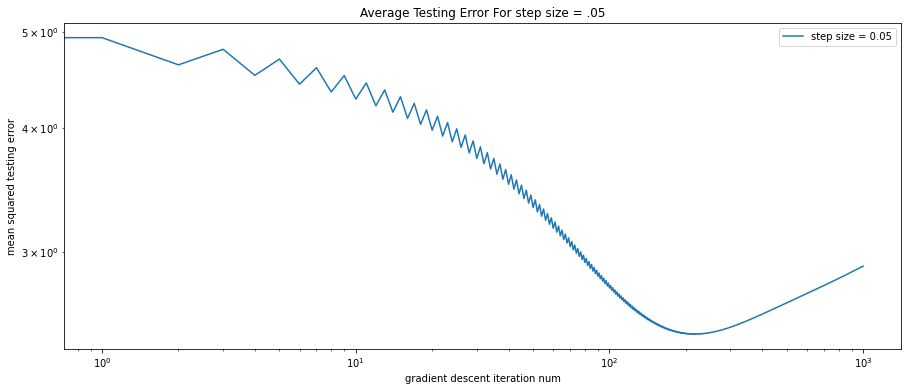

In [10]:
plt.figure(figsize=(15, 6))
#plt.plot(x_axis,loss_hist_test_5, label='0.5')
#plt.plot(x_axis,loss_hist_test_1, label='0.1')
plt.plot(x_axis,loss_hist_test_05, label='step size = 0.05')
#plt.plot(x_axis,loss_hist_test_01, label='0.01')

plt.xscale('log')
plt.yscale('log')
plt.ylabel('mean squared testing error')
plt.xlabel('gradient descent iteration num')
plt.title("Average Testing Error For step size = .05")
plt.legend()

### Problem 13 graph commentary

Just as the problem statement described, we see improvement in testing error until a minima is reached, and then our testing error starts increasing using our ideal step size of .05 from training error

# Problem 14 

Compute the gradient of $J(\lambda, \theta)$ and write down the expression $\theta$ for updating  in the gradient descent algorithm. (Matrix/vector expression, without explicit summation)


$$ J(\lambda, \theta) = \frac{1}{m} ||X\theta - y||^2_2 + \lambda \theta^T\theta $$
$$ \nabla J(\lambda, \theta) =\frac{2}{m}[ X^TX\theta - X^Ty] + 2\lambda\theta $$

### Q.E.D

# Problem 15

Complete compute_regularized_square_loss_gradient, done below

In [11]:
#######################################
### The gradient of regularized batch gradient descent

def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized average square loss function given X, y and theta

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)
        lambda_reg - the regularization coefficient

    Returns:
        grad - gradient vector, 1D numpy array of size(num_features)
    """
    m = X.shape[0]
    #create a checker to fix a shape problem that occurs for SGD
    gradient = (2/m)*((X.T @ X @ theta) - (X.T @ y)) + 2*lambda_reg*theta
    #Return gradient
    return(gradient)

# Problem 16
Complete regularized_grad_descent, done below

In [12]:
#######################################
### Regularized batch gradient descent
def regularized_grad_descent(X, y, alpha=0.05, lambda_reg=10**-2, num_step=1000):
    """
    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        alpha - step size in gradient descent
        lambda_reg - the regularization coefficient
        num_step - number of steps to run
    
    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size(num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step(num_step+1) is theta_hist[-1]
        loss hist - the history of average square loss function without the regularization term, 1D numpy array.
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.zeros(num_features) #Initialize theta
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
  
    
    for i in range(0,num_step):
        #Compute Gradient and Calculate and Append Loss
        temp_grad = compute_regularized_square_loss_gradient(X,y,theta,lambda_reg)
        loss_hist[i] = compute_square_loss(X,y,theta)

        #Calculate and write new theta
        theta = theta - (alpha * temp_grad)
        theta_hist[i,:] = theta
        
    loss_hist[1000] = compute_square_loss(X,y,theta)
    #Return theta_hist, loss_hist    
    return theta_hist, loss_hist    

# Problem 17

Plot training error and testing error for various lambdas, as a function of num step sizes

In [13]:
lambda_list = [10e-7, 10e-5, 10e-3, .1, 1, 10,100]

theta_hist_7,  loss_hist_7 = regularized_grad_descent(X_train,y_train, alpha =.05, lambda_reg = lambda_list[0])
theta_hist_5,  loss_hist_5 = regularized_grad_descent(X_train,y_train, alpha =.05,  lambda_reg = lambda_list[1])
theta_hist_3,  loss_hist_3 = regularized_grad_descent(X_train,y_train, alpha =.05, lambda_reg = lambda_list[2])
theta_hist_01, loss_hist_01 = regularized_grad_descent(X_train,y_train, alpha =.05,  lambda_reg = lambda_list[3])
theta_hist_1,  loss_hist_1 = regularized_grad_descent(X_train,y_train, alpha =.05,  lambda_reg = lambda_list[4])
theta_hist_10, loss_hist_10 = regularized_grad_descent(X_train,y_train, alpha =.05,  lambda_reg = lambda_list[5])
theta_hist_100,loss_hist_100 = regularized_grad_descent(X_train,y_train, alpha =.05, lambda_reg = lambda_list[6])

<ipython-input-3-160399dc77d2>:16: RuntimeWarning: overflow encountered in double_scalars
  return(1/num_rows * sum((y_hat-y)**2))
<ipython-input-3-160399dc77d2>:16: RuntimeWarning: overflow encountered in square
  return(1/num_rows * sum((y_hat-y)**2))
<ipython-input-11-4ce4295eacac>:19: RuntimeWarning: overflow encountered in matmul
  gradient = (2/m)*((X.T @ X @ theta) - (X.T @ y)) + 2*lambda_reg*theta
<ipython-input-11-4ce4295eacac>:19: RuntimeWarning: overflow encountered in multiply
  gradient = (2/m)*((X.T @ X @ theta) - (X.T @ y)) + 2*lambda_reg*theta
<ipython-input-3-160399dc77d2>:15: RuntimeWarning: invalid value encountered in matmul
  y_hat = X@theta
<ipython-input-12-37f8788b25f6>:29: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (alpha * temp_grad)


/Users/jobygeorge/opt/anaconda3/lib/python3.8/site-packages/numpy/ma/core.py:6845: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


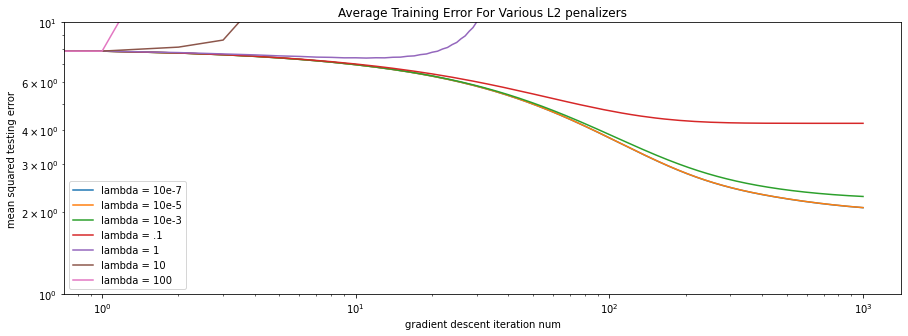

In [14]:
x = list(range(1001))
plt.figure(figsize=(15, 5))
plt.plot(x,loss_hist_7, label='lambda = 10e-7')
plt.plot(x,loss_hist_5, label='lambda = 10e-5')
plt.plot(x,loss_hist_3, label='lambda = 10e-3')
plt.plot(x,loss_hist_01, label='lambda = .1')
plt.plot(x,loss_hist_1, label='lambda = 1')
plt.plot(x,loss_hist_10, label='lambda = 10')
plt.plot(x,loss_hist_100, label='lambda = 100')

plt.ylabel('mean squared testing error')
plt.xlabel('gradient descent iteration num')
plt.xscale('log')
plt.yscale('log')
plt.title("Average Training Error For Various L2 penalizers")
plt.legend()

In [15]:
#initialize lists to store loss on test dataset
loss_hist_test_7, loss_hist_test_5, loss_hist_test_3, loss_hist_test_01 = [], [], [],[]
loss_hist_test_1, loss_hist_test_10, loss_hist_test_100 = [], [], []
x_axis = list(range(1000))

for i in range(1000):
    temp_theta_vals_7 = theta_hist_7[i,:]
    temp_theta_vals_5 = theta_hist_5[i,:] 
    temp_theta_vals_3 = theta_hist_3[i,:]
    temp_theta_vals_01 = theta_hist_01[i,:]
    temp_theta_vals_1 = theta_hist_1[i,:]
    temp_theta_vals_10 = theta_hist_10[i,:]
    temp_theta_vals_100 = theta_hist_100[i,:]




    
    loss_hist_test_7.append(compute_square_loss(X_test,y_test,temp_theta_vals_7))
    loss_hist_test_5.append(compute_square_loss(X_test,y_test,temp_theta_vals_5))
    loss_hist_test_3.append(compute_square_loss(X_test,y_test,temp_theta_vals_3))
    loss_hist_test_01.append(compute_square_loss(X_test,y_test,temp_theta_vals_01))
    loss_hist_test_1.append(compute_square_loss(X_test,y_test,temp_theta_vals_1))
    loss_hist_test_10.append(compute_square_loss(X_test,y_test,temp_theta_vals_10))
    loss_hist_test_100.append(compute_square_loss(X_test,y_test,temp_theta_vals_100))




<ipython-input-3-160399dc77d2>:16: RuntimeWarning: overflow encountered in double_scalars
  return(1/num_rows * sum((y_hat-y)**2))
<ipython-input-3-160399dc77d2>:16: RuntimeWarning: overflow encountered in square
  return(1/num_rows * sum((y_hat-y)**2))
<ipython-input-3-160399dc77d2>:15: RuntimeWarning: invalid value encountered in matmul
  y_hat = X@theta


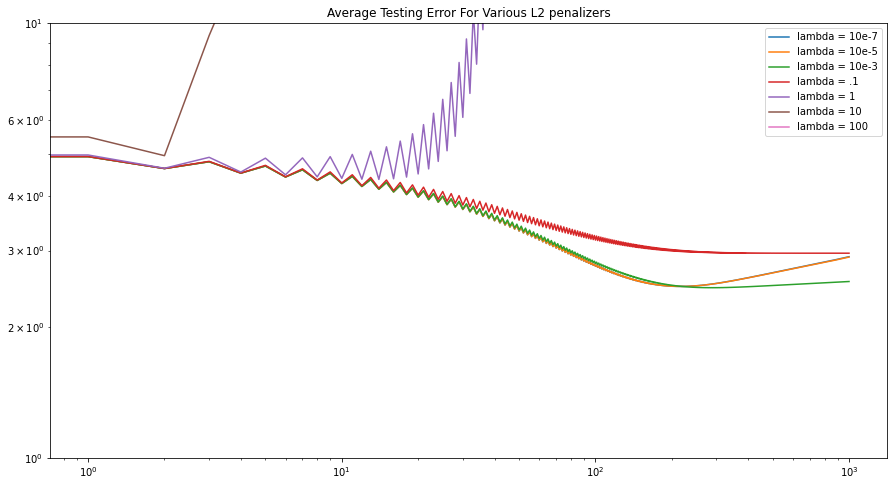

In [16]:
x = list(range(1000))
plt.figure(figsize=(15, 8))
plt.plot(x,loss_hist_test_7, label='lambda = 10e-7')
plt.plot(x,loss_hist_test_5, label='lambda = 10e-5')
plt.plot(x,loss_hist_test_3, label='lambda = 10e-3')
plt.plot(x,loss_hist_test_01, label='lambda = .1')
plt.plot(x,loss_hist_test_1, label='lambda = 1')
plt.plot(x,loss_hist_test_10, label='lambda = 10')
plt.plot(x,loss_hist_test_100, label='lambda = 100')

plt.xscale('log')
plt.yscale('log')
plt.title("Average Testing Error For Various L2 penalizers")
plt.legend()

# Problem 17 Answer:

Even without including the lambda weight as part of our loss function and just looking at square loss when calculating train and test loss, we see that the regularization parameter's impact in our gradient leads to a model that does not overfit to our training dataset as much.

For the optimal $\lambda$ value of 10e-3, we notice that training error converges to 2.29 and testing error converges to 2.58 which is quite close to the training error. 

In comparison with unregularized gradient descent, our optimal $\eta$ of .05 converged to a training error of 2.08 and a testing error of 2.90. This is almost triple the size between our regularized train and test error difference

# Problem 18

Using the last set of theta values of the gradient descent with regularization for the various different lambda's, plot train and test error, comment on which $\lambda$ you would choose.

In [17]:
def print_train_test_errors(train_error_list, test_error_list,lambda_val):
    """
    Args:
        train_error_list - a list corresponding to the training error of our \
        Ridge Regression function for a single lambda
        
        train_error_list - a list corresponding to the testing error of our \
        Ridge Regression function for a single lambda
        
        lambda_val - the lambda used for calculating the train and testing error of the previous inputs
    
    Returns:
        a message that specifies the mean square train and test error for a given lambda in
        the last iteration of our gradient descient algorithim
        
        final_train_error_list - the mean square train error for the last run of our gradient descent
        final_test_error_list hist - the mean square test error for the last run of our gradient descent.
    """
    final_train_error_list = []
    final_test_error_list = []
    message_1 = 'Average Training Error where lambda = ' + str(lambda_val) + ': '
    message_2 = str(round(train_error_list[-1],4))
    message_3 = '\nAverage Test Error where lambda = ' + str(lambda_val) + ': '
    message_4 = str(round(test_error_list[-1],4))
    final_message = message_1 + message_2 + message_3 + message_4
    final_train_error_list.append(train_error_list[-1])
    final_test_error_list.append(test_error_list[-1])
    print(final_message)
    return(final_train_error_list, final_test_error_list)


In [18]:
train_error_list = [loss_hist_7,loss_hist_5 ,loss_hist_3 ,loss_hist_01, loss_hist_1 ,loss_hist_10,
                    loss_hist_100]

test_err_list = [loss_hist_test_7, loss_hist_test_5, loss_hist_test_3, loss_hist_test_01,
                 loss_hist_test_1,
                 loss_hist_test_10,loss_hist_test_100]

plot_train_list = []
plot_test_list = []
for index in range(len(train_error_list)):
    temp1, temp2 =  print_train_test_errors(train_error_list[index],test_err_list[index], lambda_list[index])
    plot_train_list.append(temp1)
    plot_test_list.append(temp2)
    

Average Training Error where lambda = 1e-06: 2.0777
Average Test Error where lambda = 1e-06: 2.9034
Average Training Error where lambda = 0.0001: 2.079
Average Test Error where lambda = 0.0001: 2.8976
Average Training Error where lambda = 0.01: 2.2847
Average Test Error where lambda = 0.01: 2.5458
Average Training Error where lambda = 0.1: 4.2458
Average Test Error where lambda = 0.1: 2.9577
Average Training Error where lambda = 1: 2.4907665006410276e+64
Average Test Error where lambda = 1: 2.1057950195914032e+64
Average Training Error where lambda = 10: inf
Average Test Error where lambda = 10: inf
Average Training Error where lambda = 100: nan
Average Test Error where lambda = 100: nan


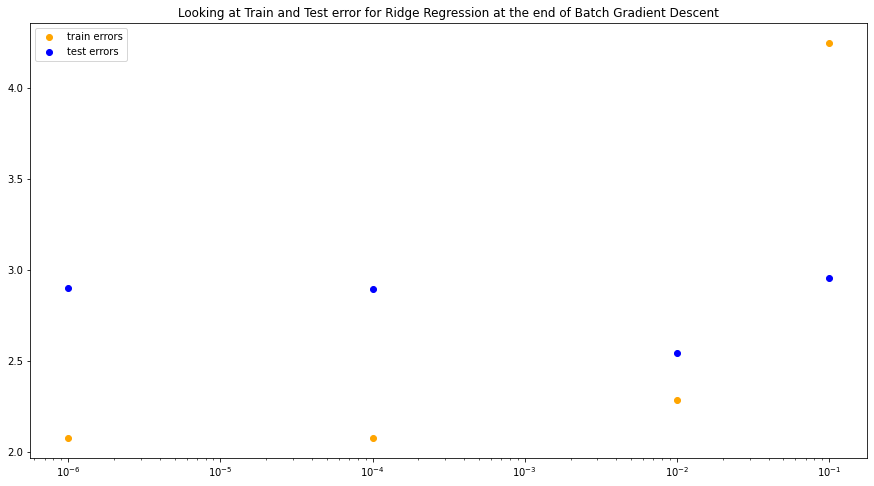

In [19]:
plt.figure(figsize=(15,8))
plt.scatter(lambda_list[0:4], plot_train_list[0:4], label = 'train errors', color = 'orange')
plt.scatter(lambda_list[0:4], plot_test_list[0:4], label = 'test errors', color = 'blue')
plt.xscale('log')
message = 'Looking at Train and Test error for Ridge Regression at the end of Batch Gradient Descent'
plt.title(message)
plt.legend()

## Problem 18 Commentary

Based off our graphs, the optimal $\lambda$ would be that which minimized test error, which would be $10^{-2}$

# Problem 19:

Add to the last plot the minimum of the test average square loss along training as a function of λ. Is the value λ you would select with early stopping the same as before?


In [20]:
def print_optimal_train_test_errors(train_error_list, test_error_list,lambda_val):
    """
    Args:
        train_error_list - a list corresponding to the training error of our \
        Ridge Regression function for a single lambda
        
        train_error_list - a list corresponding to the testing error of our \
        Ridge Regression function for a single lambda
        
        lambda_val - the lambda used for calculating the train and testing error of the previous inputs
    
    Returns:
        a message that specifies the mean square train and test error for a given lambda in
        the last iteration of our gradient descient algorithim
        
        final_train_error_list - the mean square train error for the optimal run of our gradient descent
        final_test_error_list hist - the mean square test error for the optimal run of our gradient descent.
    """
    final_train_error_list = []
    final_test_error_list = []
    message_1 = 'Average Training Error where lambda = ' + str(lambda_val) + ': '
    message_2 = str(round(min(train_error_list),4))
    message_3 = '\nAverage Test Error where lambda = ' + str(lambda_val) + ': '
    message_4 = str(round(min(test_error_list),4))
    final_message = message_1 + message_2 + message_3 + message_4
    final_train_error_list.append(min(train_error_list))
    final_test_error_list.append(min(test_error_list))
    print(final_message)
    return(final_train_error_list, final_test_error_list)



In [21]:
plot_optimal_train_list = []
plot_optimal_test_list = []
for index in range(0,len(train_error_list)):
    temp1, temp2 =  print_optimal_train_test_errors(train_error_list[index],test_err_list[index], lambda_list[index])
    plot_optimal_train_list.append(temp1)
    plot_optimal_test_list.append(temp2)
    

Average Training Error where lambda = 1e-06: 2.0777
Average Test Error where lambda = 1e-06: 2.48
Average Training Error where lambda = 0.0001: 2.079
Average Test Error where lambda = 0.0001: 2.4798
Average Training Error where lambda = 0.01: 2.2847
Average Test Error where lambda = 0.01: 2.4636
Average Training Error where lambda = 0.1: 4.2458
Average Test Error where lambda = 0.1: 2.9577
Average Training Error where lambda = 1: 7.38
Average Test Error where lambda = 1: 4.3711
Average Training Error where lambda = 10: 7.8265
Average Test Error where lambda = 10: 4.7715
Average Training Error where lambda = 100: 7.8265
Average Test Error where lambda = 100: 4.7715


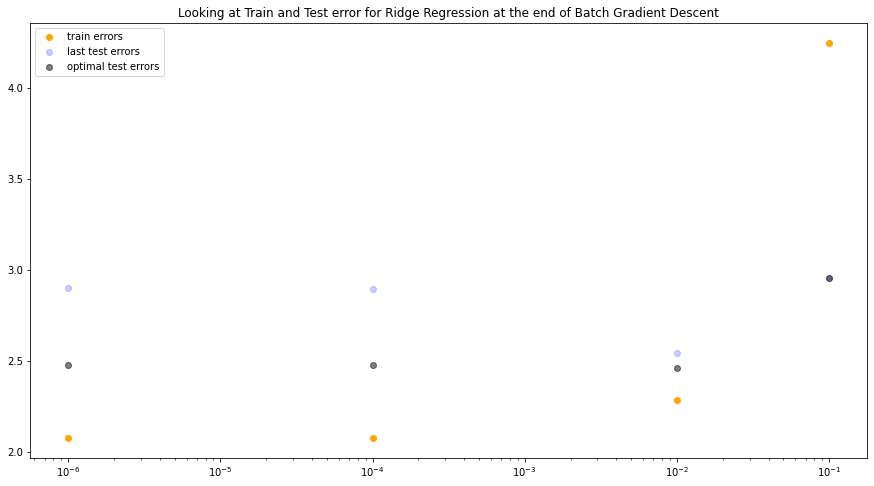

In [22]:
plt.figure(figsize=(15,8))
plt.scatter(lambda_list[0:4], plot_train_list[0:4], label = 'train errors', color = 'orange')
plt.scatter(lambda_list[0:4], plot_test_list[0:4], label = 'last test errors', color = 'blue', alpha = .2)
plt.scatter(lambda_list[0:4], plot_optimal_test_list[0:4], label = 'optimal test errors', color = 'black', alpha = .5)
plt.xscale('log')
message = 'Looking at Train and Test error for Ridge Regression at the end of Batch Gradient Descent'
plt.title(message)
plt.legend()



## Problem 19 Commentary

Based off our graphs, the optimal $\lambda$ would be that which minimized test error, which would still be $10^{-2}.$ 

However, using early stopping makes the decision less clear, as $\lambda$ $\in$ {$10^{-6}$, $10^{-4}$, $10^{-2}$} are all decimals apart from each other; 

$\lambda$ = $10^{-6}$ had an average optimal testing error of 2.48, while 

$\lambda$ = $10^{-4}$ had an average optimal testing error of 2.4798 while our highest performing 

$\lambda$ = $10^{-2}$ had an average optimal testing error of 2.4636. Meaning all three of these regularization parameters are almost equally performant

# Problem 20

We would choose the set of coefficients that provided the least test error, as this model would perform the best on unseen data which is our benchmarking strategy on models.

Based off this dataset, this would mean using ridge regression with $\lambda$ = $10^{-2}$ using early stopping, as the average test error from this approach was the lowest with 2.4636. The coefficients ($\theta$) that would be derived from this process is the $\theta$ vector we would use.

<div style="page-break-after: always;"></div>



# Problem 21

Show that our objective function:


$$J_{\lambda}(\theta)=\frac{1}{m}\sum_{i=1}^{m}\left(h_{\theta}(x_{i})-y_{i}\right)^{2}+\lambda\theta^{T}\theta
\$$

can be written in the form $J_\lambda(\theta)=\frac{1}{m}\sum_{i=1}^{m}f_{i}(\theta)$
by giving an expression for $f_{i}(\theta)$ that makes the two expressions
equivalent.


If

$$f_i(\theta) =  \left(h_{\theta}(x_{i})-y_{i}\right)^{2}+\lambda\theta^{T}\theta$$ then 

$$J_{\lambda}(\theta) = \frac{1}{m}\sum_{i=1}^{m}f_{i}(\theta)$$

**Q.E.D**


# Problem 22

Show that the stochastic gradient $\nabla_\theta f_{i}(\theta)$, for $i$
chosen uniformly at random from $\{1,\ldots,m\}$, is an unbiased estimator of $\nabla_\theta J_\lambda(\theta)$. In other words, show that $\mathbb{E}\left[\nabla f_{i}(\theta)\right]=\nabla J_\lambda(\theta)$
for any $\theta$

## Step 1: calculate the gradient

of $f_{i}(\theta)$:

$$\nabla f_{i}(\theta) = \frac{2}{m} (X_i^TX_i\theta - X^T_iy_i) + 2\lambda \theta$$


## Step 2: plug in m = 1 for SGD

$$\nabla f_{i}(\theta) = 2(X_i^TX_i\theta - X_i^Ty_i) + 2\lambda \theta$$

## Step 3: apply expected value 

$$\mathbb{E}[\nabla f_{i}(\theta)] = E[2(X_i^TX_i\theta - X_i^Ty_i) + 2\lambda \theta]$$


## Given  a sample size of one


the expected value of $$2(X_i^TX_i\theta - X_i^Ty_i) $$


$$ = 2(X_i^TX_i\theta - X_i^Ty_i) * P(X_i = i)$$


Therefore giving us: 
$$\mathbb{E}[\nabla f_{i}(\theta)] = 2(X_i^TX_i\theta - X_i^Ty_i) * P(X_i = i) + 2\lambda \theta$$

Since the probability of any selecting any individual value of X is $\frac{1}{m}$ we get

$$\mathbb{E}[\nabla f_{i}(\theta)] = \frac{2}{m}(X_i^TX_i\theta - X_i^Ty_i) + 2\lambda \theta $$

$$ = \frac{2}{m}(X_i^TX_i\theta - X_i^Ty_i) + 2\lambda \theta = \nabla J_\lambda(\theta)$$ 

therefore 

$$\mathbb{E}[\nabla f_{i}(\theta)] = \nabla J_\lambda(\theta)$$ 

**Q.E.D**

# Problem 23

Write down the update rule for $\theta$ in SGD for the ridge regression objective function

$$\theta_{i+1} = \theta_i - 2\eta[(X^T_jX_j\theta_i - X_jy_j) + \lambda\theta_i]$$

where **j** is a randomly selected row and corresponding target from our matrix X $\in$ $R^{mxd}$ and target vectory y $\in$ $R^{m}$

**i** is the iteration number in the stochastic descent algorithim

and $\eta$ is the step size in our stochastic descent algorithim

# Problem 24

Implement stochastic_grad_descent, done below

In [23]:
def stochastic_grad_descent(X, y, c = 1, alpha=0.01, lambda_reg=10**-2, num_epoch=1000, eta0=False,):
    """
    In this question you will implement stochastic gradient descent with regularization term
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - string or float, step size in gradient descent
                NOTE: In SGD, it's not a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every step is the float.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t).
                if alpha == "1/t", alpha = 1/t.
        lambda_reg - the regularization coefficient
        num_epoch - number of epochs to go through the whole training set
    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size (num_epoch, num_instances, num_features)
                     for instance, theta in epoch 0 should be theta_hist[0], theta in epoch (num_epoch) is theta_hist[-1]
        loss hist - the history of loss function vector, 2D numpy array of size (num_epoch, num_instances)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta

    theta_hist = np.zeros((num_epoch, num_instances, num_features)) #Initialize theta_hist
    loss_hist = np.zeros((num_epoch, num_instances)) #Initialize loss_hist
    #TODO
    # Set step counter

    t=1
    np.random.seed(56)
    for i in range(num_epoch):
        # Shuffle points
        shuffle = np.random.permutation(num_instances)

        for j in range(len(shuffle)):
            j_index = shuffle[j]
            # Store the historical theta
            theta_hist[i, j] = theta
            loss_hist[i, j] = compute_square_loss(X, y, theta) + np.sum(theta**2)*lambda_reg
            x_temp = X[j_index]
            y_temp = y[j_index]
            
            #reshape inputs to work with vector multiplication @ symbol in numpy
            x_temp = x_temp.reshape(1,49)
            y_temp = y_temp.reshape(1,1)
            theta = theta.reshape(49,1)
            
            # Simultaneously update theta
            grad = 2*(x_temp.T@x_temp@theta - (x_temp.T@y_temp)) + 2*lambda_reg*theta
            
            
            #reshape data back into appropriate shape for subtraction and multiplication operaitons
            grad = grad.reshape(49,)
            
            theta = theta.reshape(49,)
            if alpha == "1/t":
                theta = theta - c/t * grad #Update theta
                t+=1
            elif alpha == "1/sqrt(t)":
                theta = theta - c/np.sqrt(t) * grad #Update theta
                t+=1
            else:
                theta = theta - alpha * grad #Update theta

    return theta_hist, loss_hist

# Problem 25:

Graph the objective function for stochastic gradient descent on ridge regression for $\alpha$ = .1, $\alpha$ = .05, $\alpha$ = .005 and a varying $\alpha$, commenting on the difference in converge rates and error rates

In [24]:
sgd_theta_hist_01, sgd_loss_hist_01 = stochastic_grad_descent(X_train,y_train, alpha = .01)
#sgd_theta_hist_05, sgd_loss_hist_05 = stochastic_grad_descent(X_train,y_train, alpha = .05)
sgd_theta_hist_005, sgd_loss_hist_005 = stochastic_grad_descent(X_train,y_train, alpha = .005)
sgd_theta_hist_sqrt_01, sgd_loss_hist_sqrt_01 = stochastic_grad_descent(X_train,y_train, c=.1, alpha = "1/sqrt(t)")
sgd_theta_hist_t_01, sgd_loss_hist_t_01 = stochastic_grad_descent(X_train,y_train, c=.1, alpha = "1/t")

sgd_theta_hist_sqrt_1, sgd_loss_hist_sqrt_1 = stochastic_grad_descent(X_train,y_train, c=1, alpha = "1/sqrt(t)")
sgd_theta_hist_t_1, sgd_loss_hist_t_1 = stochastic_grad_descent(X_train,y_train, c=1, alpha = "1/t")

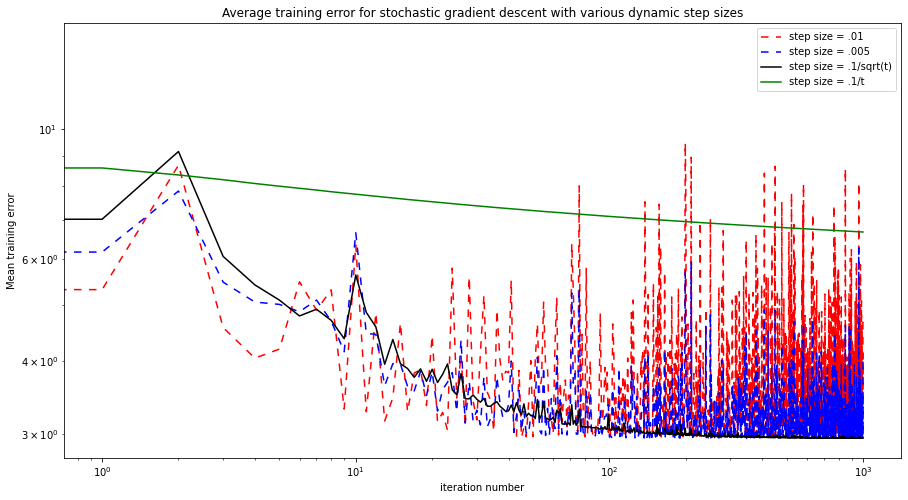

In [25]:
fig = plt.figure(figsize=(15,8))
plt.plot(sgd_loss_hist_01[:,-1], label = 'step size = .01', color = 'red', linestyle = (0, (5, 5)))

plt.plot(sgd_loss_hist_005[:,-1], label = 'step size = .005', color = 'blue', linestyle = (0, (5, 5)))
#plt.plot(np.log(sgd_loss_hist_05[:,-1]), label = 'step size = .05') causes graph to lose meaning

plt.plot(sgd_loss_hist_sqrt_01[:,-1], label = 'step size = .1/sqrt(t)', color = 'black')
plt.plot(sgd_loss_hist_t_01[:,-1], label = 'step size = .1/t', color = 'green')

#plt.plot(np.log(sgd_loss_hist_sqrt_1[:,-1]), label = 'step size = 1/sqrt(t)', linestyle = 'dashed')
#plt.plot(np.log(sgd_loss_hist_t_1[:,-1]), label = 'step size = 1/t', linestyle = 'dashed')
plt.yscale('log')
plt.xscale('log')
plt.title('Average training error for stochastic gradient descent with various dynamic step sizes')
plt.ylabel('Mean training error')
plt.xlabel('iteration number')
plt.legend()

In [26]:
#create more variant step sizes and see which performs well

sgd_theta_hist_sqrt_03, sgd_loss_hist_sqrt_03 = stochastic_grad_descent(X_train,y_train, c=.3, alpha = "1/sqrt(t)")
sgd_theta_hist_t_03, sgd_loss_hist_t_03 = stochastic_grad_descent(X_train,y_train, c=.3, alpha = "1/t")

sgd_theta_hist_sqrt_05, sgd_loss_hist_sqrt_05 = stochastic_grad_descent(X_train,y_train, c=.5, alpha = "1/sqrt(t)")
sgd_theta_hist_t_05, sgd_loss_hist_t_05 = stochastic_grad_descent(X_train,y_train, c=.5, alpha = "1/t")

sgd_theta_hist_sqrt_07, sgd_loss_hist_sqrt_07 = stochastic_grad_descent(X_train,y_train, c=.7, alpha = "1/sqrt(t)")
sgd_theta_hist_t_07, sgd_loss_hist_t_07 = stochastic_grad_descent(X_train,y_train, c=.7, alpha = "1/t")

<div style="page-break-after: always;"></div>

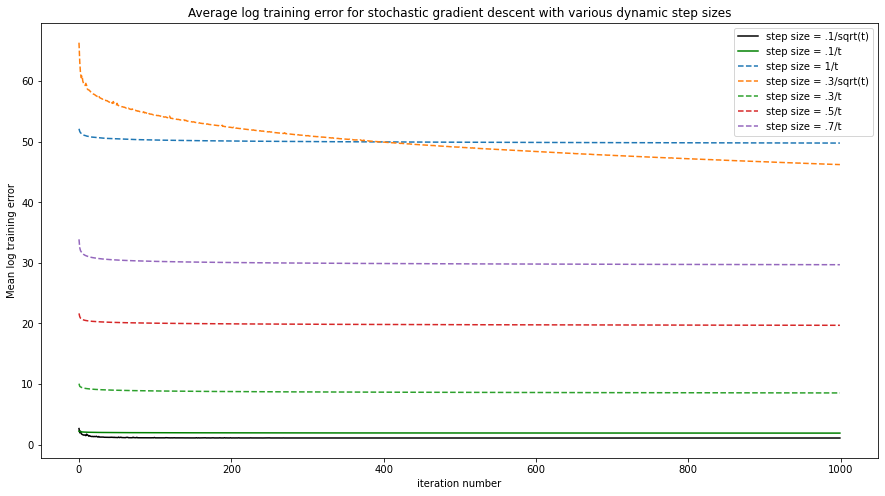

In [27]:
fig = plt.figure(figsize=(15,8))


plt.plot(np.log(sgd_loss_hist_sqrt_01[:,-1]), label = 'step size = .1/sqrt(t)', color = 'black')
plt.plot(np.log(sgd_loss_hist_t_01[:,-1]), label = 'step size = .1/t', color = 'green')

#plt.plot(np.log(sgd_loss_hist_sqrt_1[:,-1]), label = 'step size = 1/sqrt(t)', linestyle = 'dashed')
plt.plot(np.log(sgd_loss_hist_t_1[:,-1]), label = 'step size = 1/t', linestyle = 'dashed')

plt.plot(np.log(sgd_loss_hist_sqrt_03[:,-1]), label = 'step size = .3/sqrt(t)', linestyle = 'dashed')
plt.plot(np.log(sgd_loss_hist_t_03[:,-1]), label = 'step size = .3/t', linestyle = 'dashed')

#plt.plot(np.log(sgd_loss_hist_sqrt_05[:,-1]), label = 'step size = .5/sqrt(t)', linestyle = 'dashed')
plt.plot(np.log(sgd_loss_hist_t_05[:,-1]), label = 'step size = .5/t', linestyle = 'dashed')
#
#plt.plot(np.log(sgd_loss_hist_sqrt_07[:,-1]), label = 'step size = .7/sqrt(t)', linestyle = 'dashed')
plt.plot(np.log(sgd_loss_hist_t_07[:,-1]), label = 'step size = .7/t', linestyle = 'dashed')

plt.title('Average log training error for stochastic gradient descent with various dynamic step sizes')
plt.ylabel('Mean log training error')
plt.xlabel('iteration number')
plt.legend(loc='upper right')


# Problem 25 commentary

We observe a divergence with the constant step sizes, even if they start closer, the next iteration of the process usually results in increased error.

Furthermore with a constant step size of .05, which was not plotted, the error rose so quickly, that the axis was distorted and the graph above was not clearly interpretable. 

When comparing a different constant in a dynamic alpha, $\frac{.1}{\sqrt{t}}$ is the optimal choice converge to a minimal log error. What was interesting is that the $\frac{c}{t}$ worked better compared to $\frac{c}{\sqrt{t}}$for large values of c. However,$\frac{.1}{\sqrt{t}}$ was the optimal choice, and performed far better than it's sqrt counterpart.


<div style="page-break-after: always;"></div>


# Problem 26

Given a logistic loss function for logistic regression, show:

$$ L(\theta) = \frac{1}{2n} \sum_{i=1}^n(1 + y_i) \log ( 1 + e^{- h_{\theta, b}(x_i)}) +  (1 - y_i) \log(1 + e^{h_{\theta, b}(x_i)})$$

Using slides 45 and 46 from week two of lecture, we know the logistic log function is 
$$ L(\theta) = \frac{1}{n}\sum_i^{n}ln(1 +e^{-m}) \space and $$

where n = the number of data points

$$ m =  y_i h_{\theta, b}(x_i) $$

Plugging our given statements, we can equate our Loss function as:

$$ L(\theta) = \frac{1}{m}\sum_i^{m}ln(1 +e^{-y_ih_{\theta, b}(x_i)}) \space \text  where \space y \space \in {-1,1}$$

where m now equals n, rather than the margin

If we multiply this by 2/2 our logistic loss function is now:

$$ L(\theta) = \frac{1}{2m}\sum_i^{m} 2*ln(1 +e^{-y_ih_{\theta, b}(x_i)})$$

### Plugging in $y_i$ = -1 to the equivalency we need to prove

$$L(\theta) = \frac{1}{2m}\sum_i^{m}(1+-1)*ln(1 +e^{h_{\theta, b}(x_i)}) + (1+1)*ln(1+ e^{h_{\theta, b}(x_i)}) = $$


$$L(\theta) = \frac{1}{2m}\sum_i^{m}(0)*ln(1 +e^{h_{\theta, b}(x_i)}) + 2*ln(1+e^{h_{\theta, b}(x_i)}) = $$

$$L(\theta) = \frac{1}{2m}\sum_i^{m} 2*ln(1+e^{h_{\theta, b}(x_i)}) = $$

$$L(\theta) = \frac{1}{m}\sum_i^{m} ln(1+e^{h_{\theta, b}(x_i)}) = $$

which is the original logistic loss function, proving equivalency between the two when y = -1


### Plugging in $y_i$ = 1 to the equivalency we need to prove

$$L(\theta) = \frac{1}{2m}\sum_i^{m}(1+1)*ln(1 +e^{-y_ih_{\theta, b}(x_i)}) + (1-1)*ln(1+ e^{h_{\theta, b}(x_i)}) = $$

$$L(\theta) = \frac{1}{2m}\sum_i^{m}2*ln(1 +e^{-y_ih_{\theta, b}(x_i)}) + 0*ln(1+e^{h_{\theta, b}(x_i)}) = $$

$$L(\theta) = \frac{1}{2m}\sum_i^{m}2*ln(1 +e^{-y_ih_{\theta, b}(x_i)}) = $$

$$L(\theta) = \frac{1}{m}\sum_i^{m} ln(1+e^{-y_ih_{\theta, b}(x_i)}) = $$ which is the original logistic loss function, proving equivalency between the two functions when y = 1


### QED

# Problem 27

What would happen if we added an $L_1$ loss parameter to our objective function

Our loss function would change to incorporate the regularization parameter size, and the coefficients of our weights.


$$ L(\theta) = \frac{1}{n}\sum_i^{n}ln(1 +e^{-m}) + \alpha||\theta||_1 $$

Where we would add alpha times the $L_1$ norm of the coefficients 


# Problem 28

Using the method clf.predict() from the classifier write a function that takes as input an SGDClassifier which we will call clf, a design matrix X and a target vector y and returns the classification error. You should check that your function returns the same value as
1 - clf.score(X, y)

Done below

In [28]:
def classification_error(classifier, X, y):
    
    '''
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        classifier - a function that maps our input space to our target space
    Returns:
        classification error - a decimal that shows the percentage of classifications
        our model was incorrect on
        since x and y can only take a value between 1 and -1 we would divide by 2 * len of our y vector
        to get a true sense of when our model was wrong 
    '''
            
    return sum(abs(classifier.predict(X)-y))/(len(y)*2)
        

# Problem 29

In [29]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


def pre_process_mnist_01():
    """
    Load the mnist datasets, selects the classes 0 and 1 
    and normalize the data.
    Args: none
    Outputs: 
        X_train: np.array of size (n_training_samples, n_features)
        X_test: np.array of size (n_test_samples, n_features)
        y_train: np.array of size (n_training_samples)
        y_test: np.array of size (n_test_samples)
    """
    X_mnist, y_mnist = fetch_openml('mnist_784', version=1, 
                                    return_X_y=True, as_frame=False)
    indicator_01 = (y_mnist == '0') + (y_mnist == '1')
    X_mnist_01 = X_mnist[indicator_01]
    y_mnist_01 = y_mnist[indicator_01]
    X_train, X_test, y_train, y_test = train_test_split(X_mnist_01, y_mnist_01,
                                                        test_size=0.33,
                                                        shuffle=False)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train) 
    X_test = scaler.transform(X_test)

    y_test = 2 * np.array([int(y) for y in y_test]) - 1
    y_train = 2 * np.array([int(y) for y in y_train]) - 1
    return X_train, X_test, y_train, y_test


def sub_sample(N_train, X_train, y_train):
    """
    Subsample the training data to keep only N first elements
    Args: none
    Outputs: 
        X_train: np.array of size (n_training_samples, n_features)
        X_test: np.array of size (n_test_samples, n_features)
        y_train: np.array of size (n_training_samples)
        y_test: np.array of size (n_test_samples)
    """
    assert N_train <= X_train.shape[0]
    return X_train[:N_train, :], y_train[:N_train]



X_train, X_test, y_train, y_test = pre_process_mnist_01()

clf = SGDClassifier(loss='log', max_iter=1000, 
                    tol=1e-3,
                    penalty='l1', alpha=0.01, 
                    learning_rate='invscaling', 
                    power_t=0.5,                
                    eta0=0.01,
                    verbose=0)
clf.fit(X_train, y_train)



SGDClassifier(alpha=0.01, eta0=0.01, learning_rate='invscaling', loss='log',
              penalty='l1')

# Problem 29

Report the test classification error achieved by the logistic regression as a function of the regularization parameters α (taking 10 values between $10^{−4}$ and $10^{−1}$). You should make a plot with $\alpha$ as the x-axis in log scale. For each value of $\alpha$, you should repeat the experiment 10 times so has to finally report the mean value and the standard deviation. You should use plt.errorbar to plot the standard deviation as error bars.

In [30]:
def create_error_by_alpha (X_train, y_train, X_test, y_test, alpha_array, repeat_times):
    """
    Args:
        X_train - a set of training input data points used to map our prediction output
        y_train - the training label vector that corresponds to whether a digit is a 1 or 0 
        X_test - a set of testing input data points used to map our prediction output
        y_test - a set of testing labels to see how our model performs on unseen data
        alpha_array = an array of regularization parameters to optimize our model on
        repeat times - number of times we want to repeat to understand mean performance
        and variance 
        
    Returns:
        means - the mean test error associated for a particular alpha
        stdevs - the standard deviation associated test error for a particular alpha
        coefs = the coefficients of the first run for a given alpha 
    
    
    """
    means, stdevs, coeffs = [], [],[]

    
    for k in range(len(alpha_array)):
        
        small_array = np.zeros(repeat_times)
        
        clf = SGDClassifier(loss='log', max_iter=1000, 
                    tol=1e-3,
                    penalty='l1', alpha=alpha_array[k], 
                    learning_rate='invscaling', 
                    power_t=0.5,                
                    eta0=0.01,
                    verbose=0)
        
        for j in range(repeat_times):
            
            train_x, train_y = sub_sample(100, X_train, y_train)
            clf.fit(train_x, train_y)
            small_array[j]=classification_error(clf, X_test, y_test)
            
            if j ==0:
                coeffs.append(clf.coef_)
        
        mean = np.mean(small_array)
        std = np.std(small_array)
        means.append(mean)
        stdevs.append(std)
        
    return means, stdevs, np.array(coeffs)
        

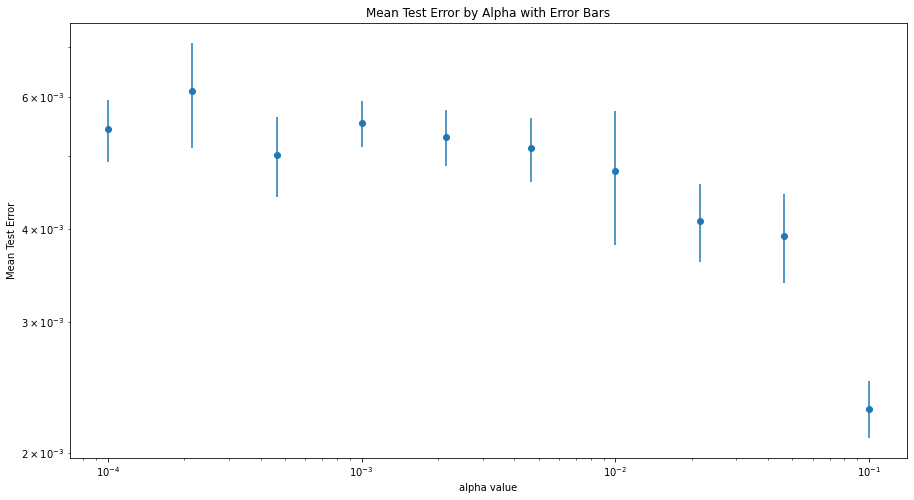

In [31]:
#create list of alphas 
alpha_list = np.logspace(-4,-1, num =10)

#
means, stds, coeffs = create_error_by_alpha (X_train, y_train, X_test, y_test,alpha_list,10)



plt.figure(figsize = (15,8))
plt.errorbar(alpha_list,means,yerr = stds, fmt = 'o')
plt.yscale("log")
plt.title("Mean Test Error by Alpha with Error Bars")
plt.ylabel('Mean Test Error')
plt.xlabel('alpha value')
plt.xscale('log')
plt.show()

# Problem 30

Which source(s) of randomness are we averaging over by repeating the experiment?

## Problem 30 answer 

By repeating the experiment and sub-sampling we are taking a different set of training data which would have a different set of optimal coefficients at the conclusion of the fitting process. 

Therefore the source of randomness would be from the underlying data generation distribution (which pictures of 0 and 1 are selected to train our model). 

If instead we had used the entirety of the training dataset to train our model, there would be no need for repeating the experiment as our test error would not change.

# Problem 31

What is the optimal value of alpha, among those tested?

## Problem 31 answer

The alpha with the lowest mean test error, by far, is $10^{-1}$, and therefore we would select that as our regularization parameter because it results in the lowest mean test error. 

In [32]:
coef_list = []

for i in range(coeffs.shape[0]):
    
    big_arr = coeffs[i][0]
    small_arr = big_arr.reshape(28,28)
    coef_list.append(small_arr)
    print("Alpha "+str(alpha_list[i])+" L1 norm: "+str(sum(abs(big_arr))))
    
    


Alpha 0.0001 L1 norm: 8.293232191651995
Alpha 0.00021544346900318845 L1 norm: 7.9556395103214586
Alpha 0.00046415888336127773 L1 norm: 8.280183395930363
Alpha 0.001 L1 norm: 7.855597766868827
Alpha 0.002154434690031882 L1 norm: 7.922240111228676
Alpha 0.004641588833612777 L1 norm: 7.52615807928987
Alpha 0.01 L1 norm: 6.918286973749174
Alpha 0.021544346900318822 L1 norm: 4.925777670075977
Alpha 0.046415888336127774 L1 norm: 3.523119915988552
Alpha 0.1 L1 norm: 2.1511488617242347


# Problem 32

Graph the coefficients of our classifier in a color bar for all values of alpha 

<Figure size 1440x720 with 0 Axes>

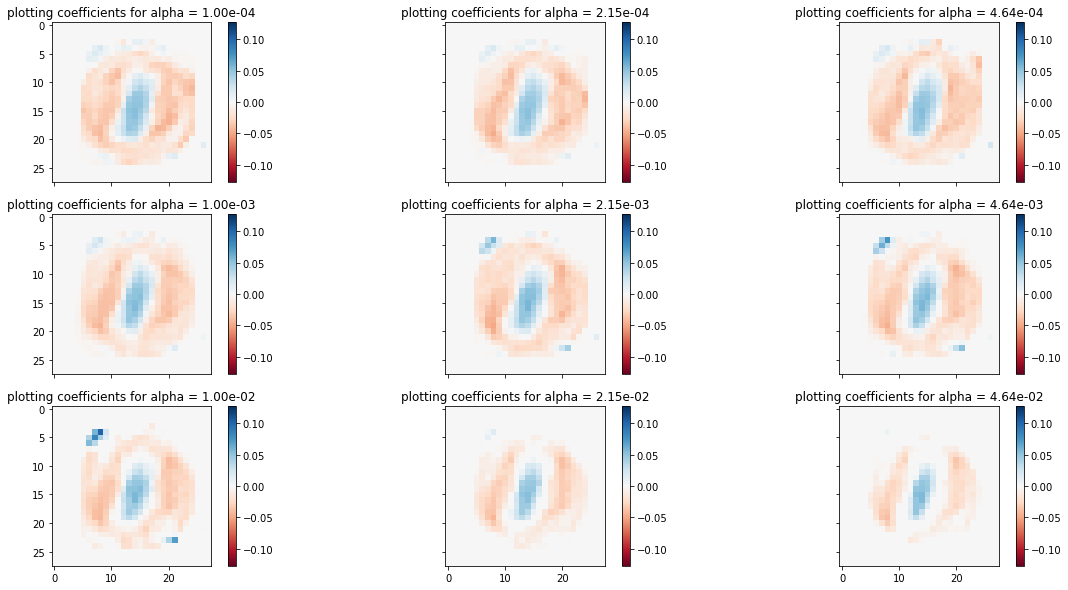

In [33]:
#https://www.kite.com/python/answers/how-to-print-a-number-in-scientific-notation-in-python
#https://matplotlib.org/stable/gallery/subplots_axes_and_figures/colorbar_placement.html 
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html 
scale = np.abs(clf.coef_).max()
plt.figure(figsize=(20, 10))


fig, axs = plt.subplots(3,3, sharex=True, sharey=True,figsize=(20,10))
i =0 
for row in range(3):
    for col in range(3):
        
        ax = axs[row, col]
        pcm = ax.imshow(coef_list[i],cmap=plt.cm.RdBu,vmax=scale, vmin=-scale)
        fig.colorbar(pcm, ax=ax)
        ax.title.set_text('plotting coefficients for alpha = ' + "{:.2e}".format(alpha_list[i]))
        i +=1
plt.show()

    


plt.show()

# Problem 33

What can you note about the pattern in $\theta$? What can you note about the effect of the regularization?


## Problem 33 answer

We notice that our coefficients take on positive values when pixels that are indicative of the digit being classified are 0, meaning as our model approaches 1, we would predict the digit in question to be a 0. 

On the flip side, negative coefficients are the pixels that are most uniquely associated with the 1, meaning as we get closer to 0 we would predict that the digit is a 1.

We notice that when alpha is approximately 0 (the first row of graphs),  the coefficient values for all of the various pixels a 0 would typically be and a 1 would typically be are strongly highlighted. However, not all of these pixels are truly needed to predict whether a digit is a 1 or 0.

Thus, as we increase alpha and our regularization parameter, our coefficients reduce in area, only saving the most important pixel locations that are used to distinguish between a 0 and 1. 

For example in comparing the last row with the top row, there is much less of a presence of coefficients for values close to the top of the 0, as they are not extremely relevant when differentiating between a 0 and 1. We also observe that the top left blue shade, associated with the downward slant of a 1 goes away as we increase our regularization parameter.